In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\bishw\\Downloads\\Compressed'

In [3]:
import pandas as pd

In [4]:
os.chdir(os.path.join(os.getcwd(),'data'))

In [5]:
customer_data = pd.read_csv("customer_dataset.csv", parse_dates= True, infer_datetime_format=True)

In [6]:
customer_data

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
...,...,...,...,...,...
406823,12680,581587,10.20,2011-12-09 12:50:00,France
406824,12680,581587,12.60,2011-12-09 12:50:00,France
406825,12680,581587,16.60,2011-12-09 12:50:00,France
406826,12680,581587,16.60,2011-12-09 12:50:00,France


In [7]:
customer_data['year'] = pd.DatetimeIndex(customer_data['InvoiceDate']).year
customer_data['month'] = pd.DatetimeIndex(customer_data['InvoiceDate']).month

In [8]:
import sweetviz as sv

In [9]:
my_report = sv.analyze(customer_data.loc[:,['AmountSpent','Country','year','month']])

In [10]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

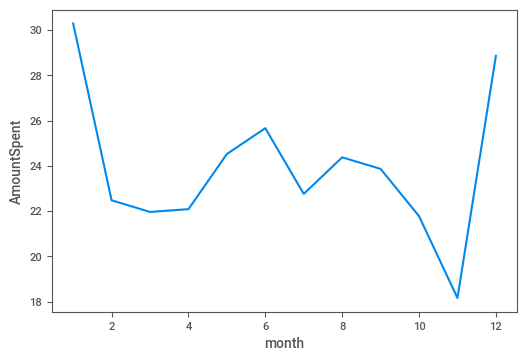

In [12]:
sns.lineplot(x = 'month', y = 'AmountSpent',data = customer_data , ci=None);

In [15]:
customer_data.describe()

,CustomerID,InvoiceNo,AmountSpent,year,month
count,406828.000000,406828.000000,406828.000000,406828.000000,406828.000000
mean,15287.694552,560581.737412,23.407303,2010.934002,7.605949
std,1713.600528,13105.458755,427.438254,0.248280,3.418947
min,12346.000000,536365.000000,0.000000,2010.000000,1.000000
25%,13953.000000,549130.000000,4.680000,2011.000000,5.000000
50%,15152.000000,561873.000000,11.800000,2011.000000,8.000000
75%,16791.000000,572065.000000,19.800000,2011.000000,11.000000
max,18287.000000,581587.000000,168469.600000,2011.000000,12.000000


In [16]:
sns.displot(customer_data['AmountSpent'], kde = False)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000266BBCDDC10> (for post_execute):


KeyboardInterrupt: 

In [19]:
user_data = pd.read_csv("user_dataset.csv", parse_dates= True, infer_datetime_format=True)

In [20]:
user_data

,CustomerID,Recency,Frequency,Revenue
0,18074,373,13,489.60
1,13747,373,1,79.60
2,12791,373,2,192.60
3,17908,373,58,243.28
4,16583,373,14,233.45
...,...,...,...,...
4367,17581,0,452,11353.97
4368,13777,0,219,26205.97
4369,15804,0,274,4564.23
4370,13113,0,280,13981.92


In [21]:
user_data_report = sv.analyze(user_data)

In [112]:
user_data_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


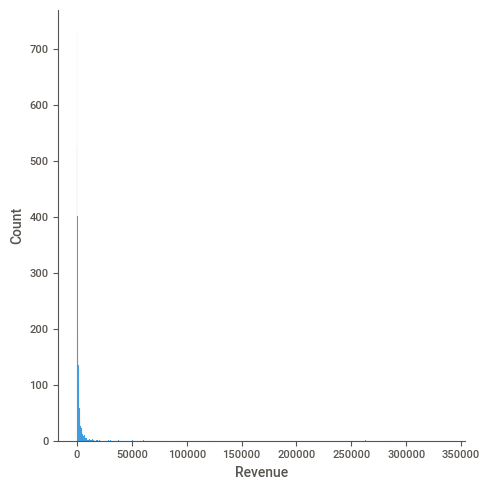

In [26]:
sns.displot(user_data['Revenue'], kde = False)

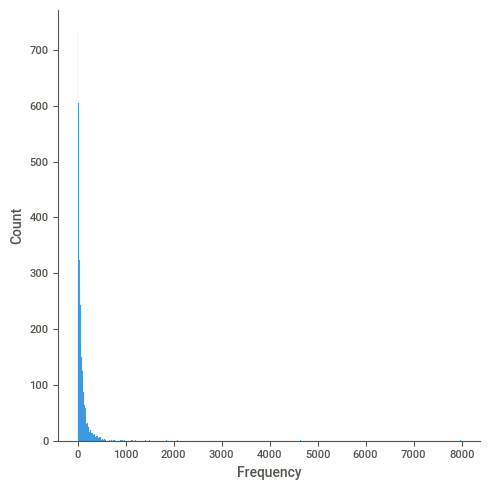

In [25]:
sns.displot(user_data['Frequency'], kde = False)

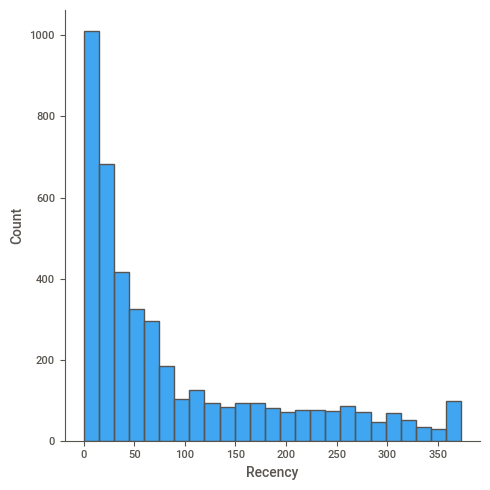

In [24]:
sns.displot(user_data['Recency'], kde = False)

In [120]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [121]:
skl=MinMaxScaler()
skl.fit(user_data[['Recency','Frequency','Revenue']])

MinMaxScaler()

In [122]:
skl_df = skl.transform(user_data[['Recency','Frequency','Revenue']])
skl_df

array([[1.00000000e+00, 1.50338261e-03, 1.45306864e-03],
       [1.00000000e+00, 0.00000000e+00, 2.36242369e-04],
       [1.00000000e+00, 1.25281884e-04, 5.71611562e-04],
       ...,
       [0.00000000e+00, 3.42019544e-02, 1.35460365e-02],
       [0.00000000e+00, 3.49536457e-02, 4.14965064e-02],
       [0.00000000e+00, 6.38937610e-03, 2.56070702e-03]])

In [123]:
skl_df = pd.concat([user_data['CustomerID'], pd.DataFrame(skl_df, columns=['Recency','Frequency','Revenue'])], axis = 1)
skl_df

,CustomerID,Recency,Frequency,Revenue
0,18074,1.0,0.001503,0.001453
1,13747,1.0,0.000000,0.000236
2,12791,1.0,0.000125,0.000572
3,17908,1.0,0.007141,0.000722
4,16583,1.0,0.001629,0.000693
...,...,...,...,...
4367,17581,0.0,0.056502,0.033697
4368,13777,0.0,0.027311,0.077776
4369,15804,0.0,0.034202,0.013546
4370,13113,0.0,0.034954,0.041497


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


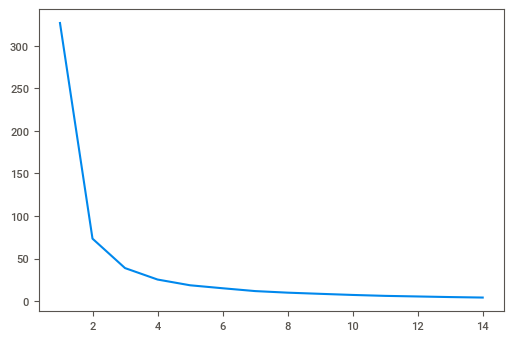

In [124]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(i)
    kmeans.fit(skl_df[['Recency','Frequency','Revenue']])
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
sns.lineplot(range(1,15), wcss);

In [129]:
kmeans = KMeans(4)
kmeans.fit(skl_df[['Recency','Frequency','Revenue']])
skl_df['cluster'] = kmeans.predict(skl_df[['Recency','Frequency','Revenue']])
skl_df

,CustomerID,Recency,Frequency,Revenue,cluster
0,18074,1.0,0.001503,0.001453,2
1,13747,1.0,0.000000,0.000236,2
2,12791,1.0,0.000125,0.000572,2
3,17908,1.0,0.007141,0.000722,2
4,16583,1.0,0.001629,0.000693,2
...,...,...,...,...,...
4367,17581,0.0,0.056502,0.033697,3
4368,13777,0.0,0.027311,0.077776,3
4369,15804,0.0,0.034202,0.013546,3
4370,13113,0.0,0.034954,0.041497,3


<AxesSubplot:xlabel='cluster', ylabel='Frequency'>

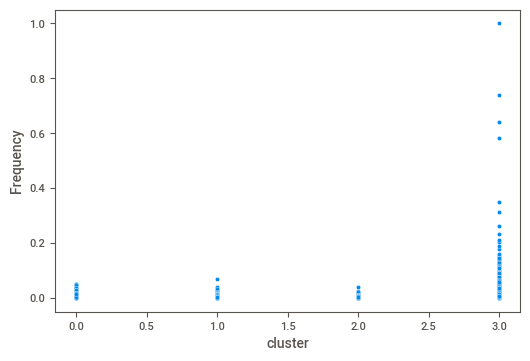

In [130]:
sns.scatterplot(x = 'cluster',y = 'Frequency', data = skl_df)

<AxesSubplot:xlabel='cluster', ylabel='Revenue'>

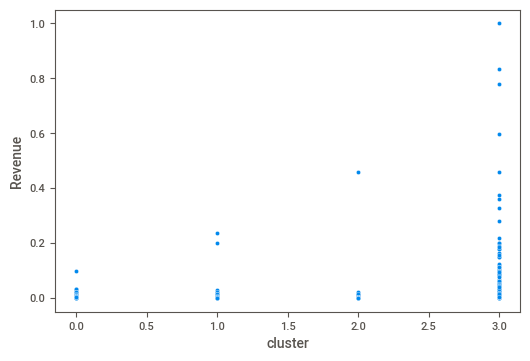

In [131]:
sns.scatterplot(x = 'cluster',y = 'Revenue', data = skl_df)

<AxesSubplot:xlabel='cluster', ylabel='Recency'>

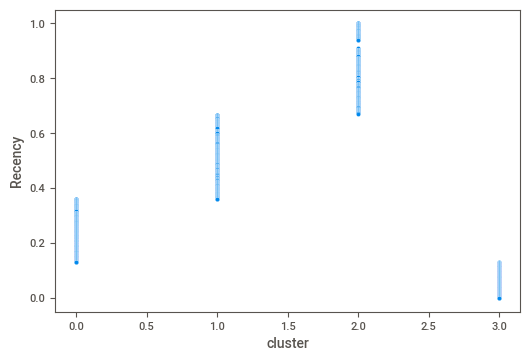

In [132]:
sns.scatterplot(x = 'cluster',y = 'Recency', data = skl_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


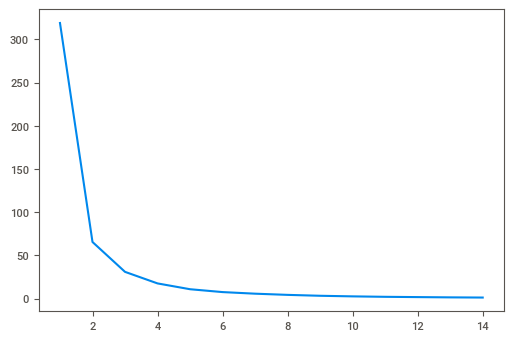

In [49]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(i)
    kmeans.fit(skl_df[['Recency']])
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
sns.lineplot(range(1,15), wcss);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


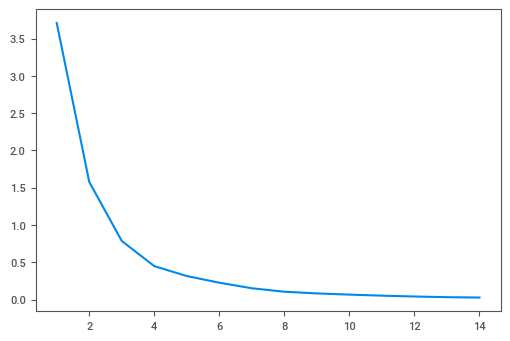

In [50]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(i)
    kmeans.fit(skl_df[['Frequency']])
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
sns.lineplot(range(1,15), wcss);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


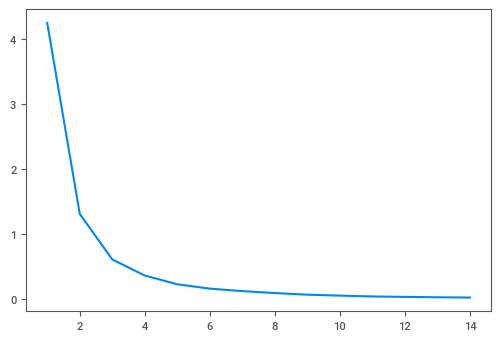

In [51]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(i)
    kmeans.fit(skl_df[['Revenue']])
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
sns.lineplot(range(1,15), wcss);

In [53]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(skl_df[['Recency']])


KMeans(n_clusters=4)

In [55]:
skl_df['Recency_clusters'] = kmeans.predict(skl_df[['Recency']])

In [56]:
skl_df

,CustomerID,Recency,Frequency,Revenue,Recency_clusters
0,18074,1.0,0.001503,0.001453,2
1,13747,1.0,0.000000,0.000236,2
2,12791,1.0,0.000125,0.000572,2
3,17908,1.0,0.007141,0.000722,2
4,16583,1.0,0.001629,0.000693,2
...,...,...,...,...,...
4367,17581,0.0,0.056502,0.033697,0
4368,13777,0.0,0.027311,0.077776,0
4369,15804,0.0,0.034202,0.013546,0
4370,13113,0.0,0.034954,0.041497,0


In [89]:
def make_cluster(dataFrame, n_clusters):
    for i in dataFrame.columns[1:]:
        kmeans = KMeans(n_clusters)
        kmeans.fit(dataFrame[[i]])
        dataFrame[i+'_cluster'] = kmeans.predict(dataFrame[[i]])
    return dataFrame

In [90]:
skl_df = make_cluster(skl_df, 4)

In [91]:
skl_df

,CustomerID,Recency,Frequency,Revenue,Recency_cluster,Frequency_cluster,Revenue_cluster
0,18074,1.0,0.001503,0.001453,3,0,0
1,13747,1.0,0.000000,0.000236,3,0,0
2,12791,1.0,0.000125,0.000572,3,0,0
3,17908,1.0,0.007141,0.000722,3,0,0
4,16583,1.0,0.001629,0.000693,3,0,0
...,...,...,...,...,...,...,...
4367,17581,0.0,0.056502,0.033697,1,3,0
4368,13777,0.0,0.027311,0.077776,1,3,3
4369,15804,0.0,0.034202,0.013546,1,3,0
4370,13113,0.0,0.034954,0.041497,1,3,0


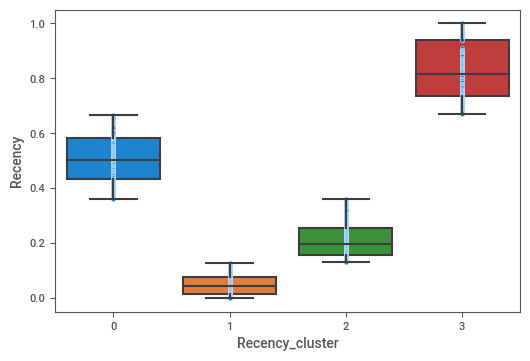

Recency_cluster
0    0.507912
1    0.047020
2    0.212544
3    0.828021
Name: Recency, dtype: float64


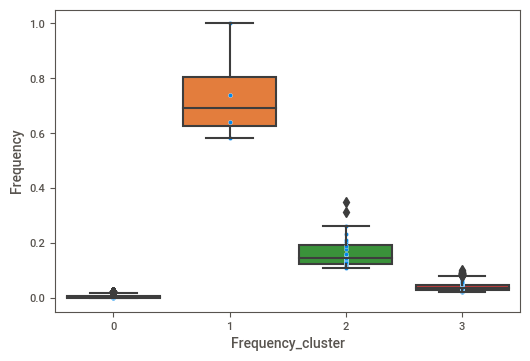

Frequency_cluster
0    0.006099
1    0.740792
2    0.168974
3    0.041033
Name: Frequency, dtype: float64


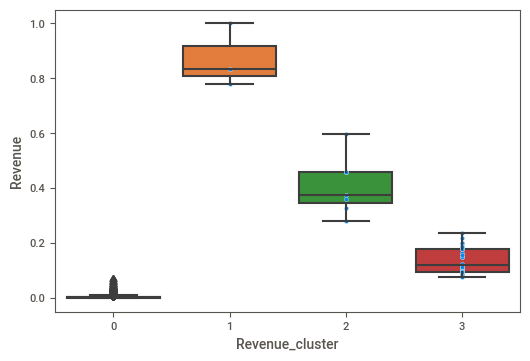

Revenue_cluster
0    0.004345
1    0.871308
2    0.408548
3    0.136624
Name: Revenue, dtype: float64


In [101]:
for i in range(1,4):
    sns.scatterplot(x = skl_df.columns[i+3], y = skl_df.columns[i], data = skl_df)
    sns.boxplot(x = skl_df.columns[i+3], y = skl_df.columns[i], data = skl_df)
    plt.show()
    print(skl_df.groupby(by=skl_df.columns[i+3])[skl_df.columns[i]].agg('mean'))

In [105]:
skl_df['Revenue_score'] = skl_df['Revenue_cluster'].map({1:4, 2:3,3:3,0:0})
skl_df['Frequency_score'] = skl_df['Frequency_cluster'].map({1:4, 2:3,3:3,0:0})
skl_df['Recency_score'] = skl_df['Recency_cluster'].map({1:0,2:2,3:4,0:3})

In [107]:
skl_df['Total_score'] = skl_df['Recency_score']+skl_df['Frequency_score']+skl_df['Revenue_score']

In [133]:
skl_df.groupby('cluster')[['Recency','Frequency','Revenue']].agg('mean')

,Recency,Frequency,Revenue
cluster,,,
0,0.212620,0.006520,0.003113
1,0.507912,0.004244,0.002541
2,0.828021,0.002783,0.002091
3,0.047059,0.018159,0.010275


In [111]:
skl_df.groupby('Total_score')[['Recency','Frequency','Revenue']].agg('mean')

,Recency,Frequency,Revenue
Total_score,,,
0,0.051351,0.008231,0.004186
2,0.213063,0.005540,0.002822
3,0.309937,0.021241,0.008244
4,0.826354,0.002666,0.003120
5,0.201072,0.032003,0.008220
6,0.141259,0.075709,0.154580
7,0.278820,0.371516,0.334941
8,0.136729,0.028564,0.099240


In [134]:
cluster_details = {3:'High Revenue/Frequency, Less Recency', 0:'High Revenue/Frequency, Less Recency',2:'Low Revenue/Frequency, High Recency', 1:'Medium Revenue/Frequency, Medium Recency'}

In [135]:
cluster_details

{3: 'High Revenue/Frequency, Less Recency',
 0: 'High Revenue/Frequency, Less Recency',
 2: 'Low Revenue/Frequency, High Recency',
 1: 'Medium Revenue/Frequency, Medium Recency'}

In [142]:
import pickle

In [143]:
pickle.dump(kmeans, open('cluster.pkl','wb'))

In [144]:
mdl = pickle.load(open('cluster.pkl','rb'))

In [147]:
mdl.predict([[1,1,1]])

array([2])

MinMaxScaler()